## Aplicações da Física Clássica no Mercado Financeiro

 

#### Etapas

- Passo 1 - Carregar as bibliotecas

- Passo 2 - Carregar a base de dados

- Passo 3 - Tratamento dos dados

- Passo 4 - Construçao dos alvos

- Passo 5 - Construçao das Variaveis

- Passo 6 - Treinamento do Modelo

- Passo 7 - Avaliaçao dos Resultados

- Passo 8 - Avaliaçao dos Modelos

________________________________________________________


### Passo 1 - Carregar as bibliotecas

In [150]:
# Carregando as bibliotecas

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline



______________________________________________________

### Passo 2 - Carregar a base de dados

In [151]:
# Carregando a base de dados e fazendo os checks iniciais

# Muda o diretorio de trabalho
import os
os.chdir("C:\\Users\\engle\\OM Na Pratica\\Finanças Quantitativas\\Bases de Dados")

df1 = pd.read_csv("EURUSD_Daily_Bid_2009.09.30_2019.10.24.csv", sep = ";")

df1.shape[0]

2627

______________________________________________________

### Passo 3 - Tratamento dos dados

In [152]:
df1 = df1.rename(columns = {"Time (CAT)": "Date"})

In [153]:
# Ajustando a data - precisamos transforma-la nos indices do data frame

df1["Data"] = pd.to_datetime(df1["Date"]).dt.normalize()

df1 = df1.set_index("Data")

df1.drop(["Date"], axis=1, inplace=True)


In [154]:
df1.head()

,Open,High,Low,Close,Volume
Data,,,,,
2009-09-30,1.46404,1.46668,1.45154,1.45415,80746.3
2009-10-01,1.45436,1.46467,1.44792,1.45743,80633.4
2009-10-04,1.45773,1.46685,1.45772,1.46480,81029.8
2009-10-05,1.46457,1.47612,1.46430,1.47212,81421.4
2009-10-06,1.47200,1.47361,1.46480,1.46887,81847.6


In [155]:
df1.describe()

,Open,High,Low,Close,Volume
count,2627.000000,2627.000000,2627.000000,2627.000000,2.627000e+03
mean,1.239255,1.244429,1.234097,1.239194,2.251913e+05
std,0.118138,0.118662,0.117213,0.118073,1.554760e+05
min,1.038830,1.041780,1.034030,1.038820,0.000000e+00
25%,1.127320,1.131965,1.122620,1.127325,1.603489e+05
50%,1.237660,1.243490,1.232310,1.237660,2.045263e+05
75%,1.338700,1.343585,1.333580,1.338740,2.504352e+05
max,1.513320,1.514410,1.503900,1.513280,1.469805e+06


______________________________________________________

### Passo 4 - Construçao dos alvos

In [156]:
# Construcao dos alvos

periodos = 1

# Alvo 1 - Retorno
df1["Retorno"] = df1["Close"].pct_change(periodos)
df1["Alvo1"] = df1["Retorno"].shift(-periodos)

# Variaçao em Pips do alvo
df1["Pips"] = (df1["Close"] - df1["Close"].shift(periodos))*10000
df1["Pips"] = df1["Pips"].shift(-periodos)

# Criacao do alvo
df1["Alvo_Bin"] = np.where(df1['Alvo1'] > 0 , 1, 0)

In [157]:
df1.head(10)

,Open,High,Low,Close,Volume,Retorno,Alvo1,Pips,Alvo_Bin
Data,,,,,,,,,
2009-09-30,1.46404,1.46668,1.45154,1.45415,80746.3,NaN,0.002256,32.8,1
2009-10-01,1.45436,1.46467,1.44792,1.45743,80633.4,0.002256,0.005057,73.7,1
2009-10-04,1.45773,1.46685,1.45772,1.46480,81029.8,0.005057,0.004997,73.2,1
2009-10-05,1.46457,1.47612,1.46430,1.47212,81421.4,0.004997,-0.002208,-32.5,0
2009-10-06,1.47200,1.47361,1.46480,1.46887,81847.6,-0.002208,0.007046,103.5,1
2009-10-07,1.46893,1.48160,1.46794,1.47922,80459.8,0.007046,-0.004273,-63.2,0
2009-10-08,1.47923,1.47973,1.46721,1.47290,81972.7,-0.004273,0.002845,41.9,1
2009-10-11,1.47240,1.48127,1.46751,1.47709,80571.1,0.002845,0.005443,80.4,1
2009-10-12,1.47711,1.48756,1.47575,1.48513,82395.8,0.005443,0.005084,75.5,1


In [158]:
df1.tail(10)

,Open,High,Low,Close,Volume,Retorno,Alvo1,Pips,Alvo_Bin
Data,,,,,,,,,
2019-10-13,1.10316,1.10426,1.10128,1.10248,154882.9700,-0.000734,0.000653,7.2,1
2019-10-14,1.10250,1.10459,1.09912,1.10320,225723.7900,0.000653,0.003535,39.0,1
2019-10-15,1.10319,1.10855,1.10223,1.10710,233180.1260,0.003535,0.004733,52.4,1
2019-10-16,1.10710,1.11398,1.10650,1.11234,222120.3900,0.004733,0.004216,46.9,1
2019-10-17,1.11236,1.11719,1.11145,1.11703,146440.9600,0.004216,-0.001934,-21.6,0
2019-10-20,1.11607,1.11793,1.11386,1.11487,127017.5650,-0.001934,-0.002189,-24.4,0
2019-10-21,1.11487,1.11568,1.11176,1.11243,124844.3600,-0.002189,0.000485,5.4,1
2019-10-22,1.11242,1.11405,1.11061,1.11297,114032.9300,0.000485,-0.002336,-26.0,0
2019-10-23,1.11296,1.11627,1.10930,1.11037,147677.3094,-0.002336,-0.002224,-24.7,0


In [159]:
# Analisando a proporçao dos alvos categoricos

df1["Alvo_Bin"].value_counts(normalize=True)*100

0    50.171298
1    49.828702
Name: Alvo_Bin, dtype: float64

______________________________________________________

### Passo 5 - Construçao das Variaveis

In [160]:
# Aplicando a fisica

p = 5 

# Velocidade de p dias
df1["v"] = (df1["Retorno"] - df1["Retorno"].shift(p))/p

# Aceleraçao de p dias
df1["a"] = (df1["v"] - df1["v"].shift(p))/p

# Força
# Calculando a massa
df1["m"] = df1["Retorno"].rolling(p).sum()
df1["f"] = df1["m"]*df1["a"]

# Energia cinética
df1["T"] = 0.5*df1["m"]*df1["v"]*df1["v"]


# Trabalho 
# cateto_oposto
cat_op = df1["Retorno"].rolling(p).sum()-df1["Retorno"].rolling(1).sum()
cat_ad = p
df1["cat"] = cat_op/cat_ad
df1 = df1.dropna(axis = 0)
df1["w"] = df1["f"]*np.cos(np.arctan(df1["cat"]))

# Energia potencial
df1["k"] = cat_op*df1["m"]

# Torque
df1["tau"] = df1["f"]*np.sin(np.arctan(df1["cat"]))

# Momentum
df1["M"] = df1["m"]*df1["v"]

# Gravidade
df1["g"] = df1["m"]*df1["Retorno"].rolling(p).sum()/(df1["m"]/df1["Retorno"].rolling(p).sum())*(df1["m"]/df1["Retorno"].rolling(p).sum())

df1.head(10)

,Open,High,Low,Close,Volume,Retorno,Alvo1,Pips,Alvo_Bin,v,a,m,f,T,cat,w,k,tau,M,g
Data,,,,,,,,,,,,,,,,,,,,
2009-10-15,1.49453,1.49660,1.48463,1.49032,81677.9,-0.002930,0.004026,60.0,1,0.000268,0.000315,0.011795,3.713055e-06,4.249362e-10,0.002945,3.713039e-06,0.000174,1.093480e-08,3.166043e-06,NaN
2009-10-18,1.49047,1.49656,1.48301,1.49632,81065.4,0.004026,-0.001256,-18.8,0,0.000236,0.000136,0.012976,1.761263e-06,3.621168e-10,0.001790,1.761260e-06,0.000116,3.152579e-09,3.065531e-06,NaN
2009-10-19,1.49634,1.49940,1.48806,1.49444,79114.3,-0.001256,0.004731,70.7,1,-0.001340,-0.000286,0.006276,-1.793846e-06,5.634027e-09,0.001507,-1.793844e-06,0.000047,-2.702472e-09,-8.409560e-06,NaN
2009-10-20,1.49449,1.50456,1.48846,1.50151,79788.7,0.004731,0.001059,15.9,1,-0.000071,-0.000306,0.005923,-1.811193e-06,1.475043e-11,0.000238,-1.811193e-06,0.000007,-4.319630e-10,-4.180239e-07,NaN
2009-10-21,1.50146,1.50383,1.49413,1.50310,80394.2,0.001059,-0.001683,-25.3,0,-0.000059,0.000216,0.005629,1.215558e-06,9.753286e-12,0.000914,1.215557e-06,0.000026,1.111039e-09,-3.313650e-07,0.000032
2009-10-22,1.50298,1.50590,1.49830,1.50057,79298.1,-0.001683,-0.008757,-131.4,0,0.000249,-0.000004,0.006876,-2.613010e-08,2.139073e-10,0.001712,-2.613007e-08,0.000059,-4.473137e-11,1.715147e-06,0.000047
2009-10-25,1.49934,1.50600,1.48420,1.48743,79935.1,-0.008757,-0.004841,-72.0,0,-0.002557,-0.000559,-0.005906,3.299098e-06,-1.930191e-08,0.000570,3.299097e-06,-0.000017,1.880617e-09,1.510008e-05,0.000035
2009-10-26,1.48750,1.49260,1.47660,1.48023,79202.0,-0.004841,-0.006648,-98.4,0,-0.000717,0.000125,-0.009491,-1.182684e-06,-2.438353e-09,-0.000930,-1.182684e-06,0.000044,1.099909e-09,6.803159e-06,0.000090
2009-10-27,1.48023,1.48405,1.46888,1.47039,79406.8,-0.006648,0.007937,116.7,1,-0.002276,-0.000441,-0.020869,9.203796e-06,-5.403843e-08,-0.002844,9.203759e-06,0.000297,-2.617823e-08,4.749176e-05,0.000436


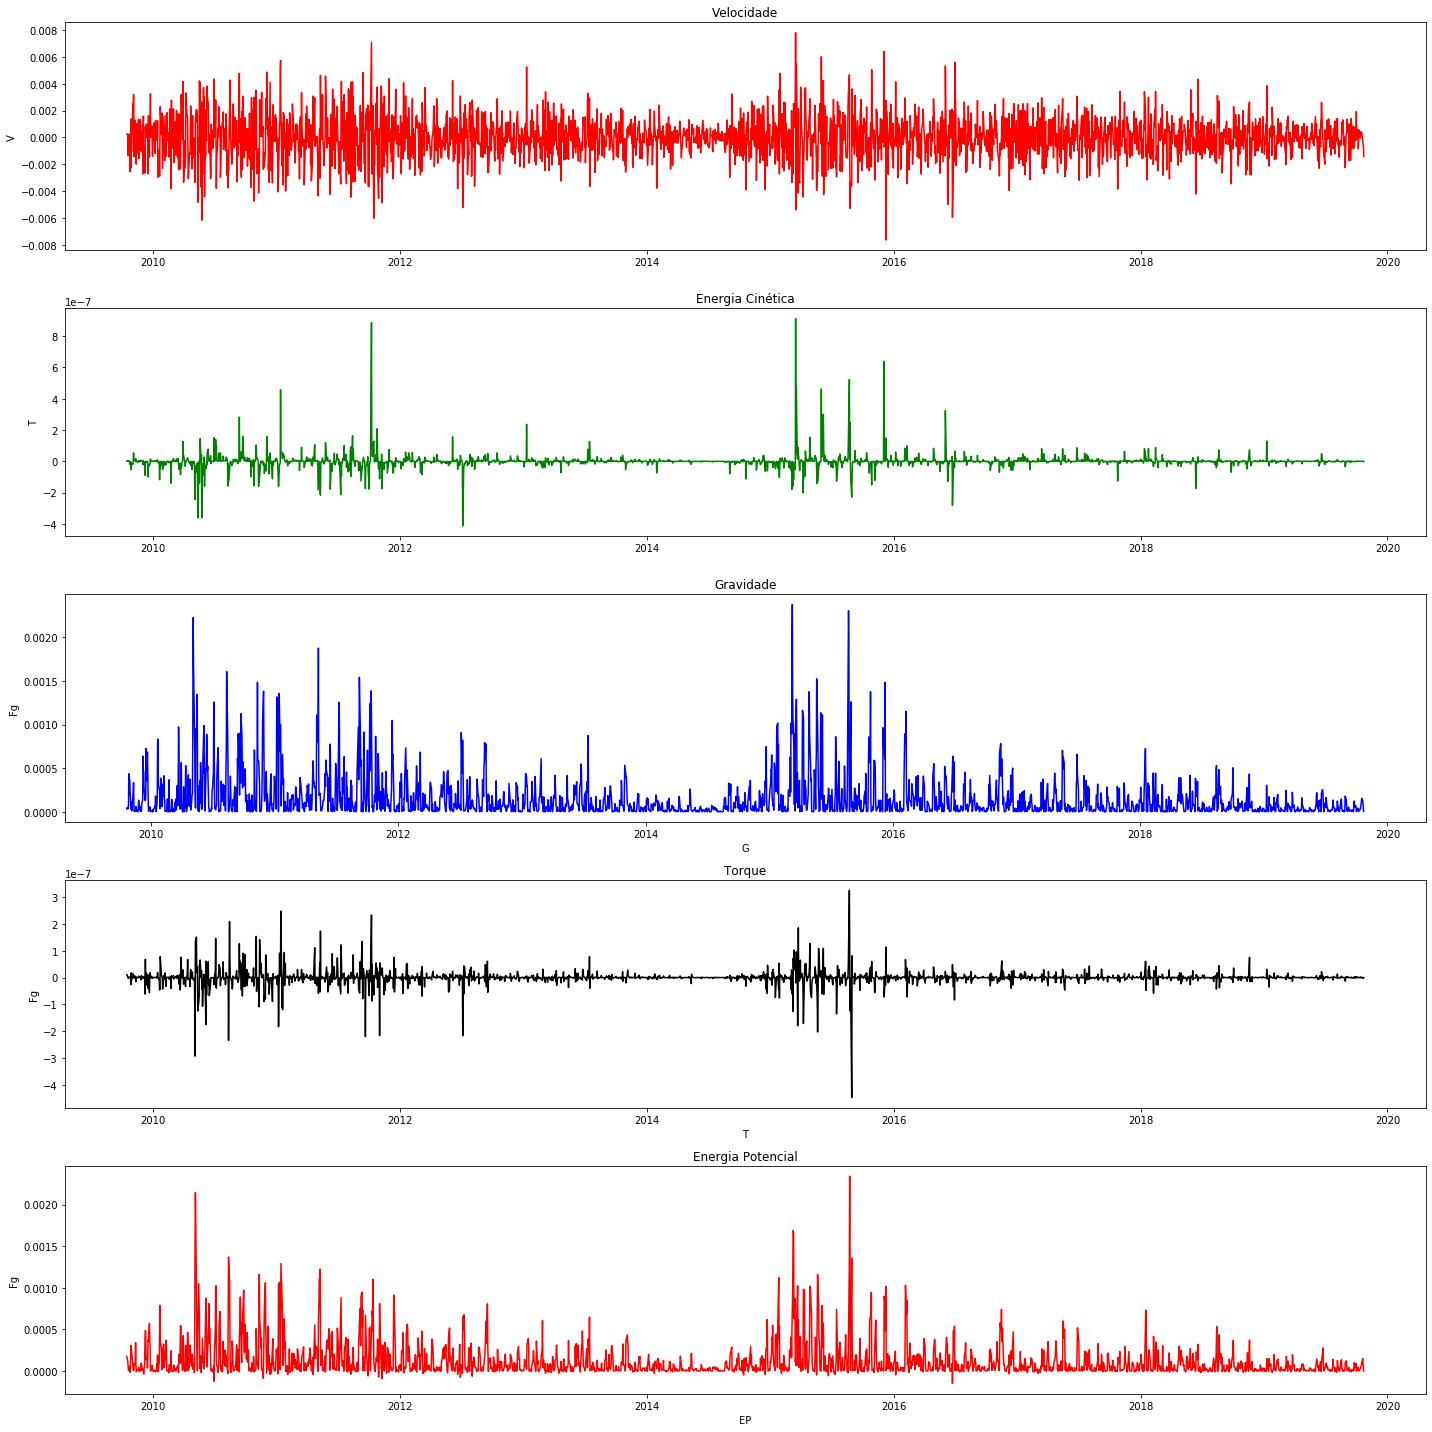

In [161]:
fig, ax = plt.subplots(5,figsize=(20, 20))

ax[0].plot(df1["v"], color = "red")
ax[1].plot(df1["T"], color = "green");
ax[2].plot(df1["g"], color = "blue");
ax[3].plot(df1["tau"], color = "black");
ax[4].plot(df1["k"], color = "red");

ax[0].set(ylabel = "V"
          , title = "Velocidade")

ax[1].set(ylabel = "T"
          , title = "Energia Cinética")

ax[2].set(xlabel = "G", ylabel = "Fg"
          , title = "Gravidade")

ax[3].set(xlabel = "T", ylabel = "Fg"
          , title = "Torque")

ax[4].set(xlabel = "EP", ylabel = "Fg"
          , title = "Energia Potencial")

# E este aqui é para afastar os graficos e melhorar a visualizaçao
fig.tight_layout()


In [162]:
# Filtrando os valores missing

df1_filtrado = df1.dropna(axis = 0) 

In [163]:
corte = 5

df1_filtrado["v"] = pd.qcut(df1_filtrado["v"], corte, labels = False)
df1_filtrado["a"] = pd.qcut(df1_filtrado["a"], corte, labels = False)
df1_filtrado["m"] = pd.qcut(df1_filtrado["m"], corte, labels = False)
df1_filtrado["f"] = pd.qcut(df1_filtrado["f"], corte, labels = False)
df1_filtrado["T"] = pd.qcut(df1_filtrado["T"], corte, labels = False)
df1_filtrado["w"] = pd.qcut(df1_filtrado["w"], corte, labels = False)
df1_filtrado["k"] = pd.qcut(df1_filtrado["k"], corte, labels = False)
df1_filtrado["tau"] = pd.qcut(df1_filtrado["tau"], corte, labels = False)
df1_filtrado["M"] = pd.qcut(df1_filtrado["M"], corte, labels = False)
df1_filtrado["g"] = pd.qcut(df1_filtrado["g"], corte, labels = False)

D:\Anaconda\envs\R\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\envs\R\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Anaconda\envs\R\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [164]:
df1_filtrado.head()

,Open,High,Low,Close,Volume,Retorno,Alvo1,Pips,Alvo_Bin,v,a,m,f,T,cat,w,k,tau,M,g
Data,,,,,,,,,,,,,,,,,,,,
2009-10-21,1.50146,1.50383,1.49413,1.50310,80394.2,0.001059,-0.001683,-25.3,0,2,3,3,3,2,0.000914,3,2,3,1,1
2009-10-22,1.50298,1.50590,1.49830,1.50057,79298.1,-0.001683,-0.008757,-131.4,0,2,2,3,2,3,0.001712,2,2,2,2,2
2009-10-25,1.49934,1.50600,1.48420,1.48743,79935.1,-0.008757,-0.004841,-72.0,0,0,0,1,3,0,0.000570,3,0,3,4,2
2009-10-26,1.48750,1.49260,1.47660,1.48023,79202.0,-0.004841,-0.006648,-98.4,0,1,3,1,1,1,-0.000930,1,2,3,3,3
2009-10-27,1.48023,1.48405,1.46888,1.47039,79406.8,-0.006648,0.007937,116.7,1,0,0,0,4,0,-0.002844,4,4,0,4,4


______________________________________________________

### Passo 6 - Treinamento do modelo

In [165]:
# Separando os dados entre treinamento e teste

# Nossa base vai de 30-09-2009 a 24-10-2019

# Vamos treinar o modelo de 2009 a 2013
start_train = "2009-09-30"
end_train = "2013-12-31"

# Vamos testar o modelo de 2014 a 2019
start_test = "2014-01-01"
end_test = "2019-10-24"

df1_train1 = df1_filtrado[start_train : end_train]

df1_test1 = df1_filtrado[start_test : end_test]

In [166]:
print(df1_train1.shape)

print(df1_test1.shape)

(1094, 20)
(1517, 20)


In [167]:
df1_train1.tail()

,Open,High,Low,Close,Volume,Retorno,Alvo1,Pips,Alvo_Bin,v,a,m,f,T,cat,w,k,tau,M,g
Data,,,,,,,,,,,,,,,,,,,,
2013-12-25,1.36751,1.36809,1.36606,1.36800,3644.76,0.000314,0.000789,10.8,1,4,4,2,2,2,-0.000109,2,0,2,1,0
2013-12-26,1.36800,1.37015,1.36619,1.36908,60597.15,0.000789,0.004163,57.0,1,3,2,2,2,3,0.000280,2,1,2,2,0
2013-12-27,1.36905,1.38932,1.36869,1.37478,198522.37,0.004163,0.003957,54.4,1,3,2,3,2,3,0.000300,2,1,2,3,1
2013-12-30,1.37558,1.38189,1.37280,1.38022,145202.06,0.003957,-0.004434,-61.2,0,3,2,3,2,3,0.000761,2,2,3,3,2
2013-12-31,1.37971,1.38123,1.37410,1.37410,113992.87,-0.004434,0.000000,0.0,0,1,2,3,2,3,0.001845,2,2,1,1,1


In [168]:
df1.columns[9:df1.shape[1]]

Index(['v', 'a', 'm', 'f', 'T', 'cat', 'w', 'k', 'tau', 'M', 'g'], dtype='object')

In [169]:
df1 = df1.drop(["m","cat","M"], axis=1)

In [170]:
# Separando os dados com as variaveis em x e o alvo em y
 
x_train1 = df1_train1.iloc[:, 9:df1.shape[1]]
y_train1 = df1_train1['Alvo_Bin']

x_test1 = df1_test1.iloc[:, 9:df1.shape[1]]
y_test1 = df1_test1['Alvo_Bin']

In [171]:
# Treinando o modelo

rf1 = RandomForestClassifier(bootstrap = True,
           criterion = 'gini', max_depth = 10, max_features = 'auto',
           min_samples_leaf = 1, min_samples_split = 2,
           n_estimators = 1500, n_jobs = 5, oob_score = True, random_state = 42)

rf1.fit(x_train1, y_train1) # essa é a linha que treina o modelo!!!!

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=5, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [172]:
# Prediçoes para o teste

y_pred_test1 = rf1.predict(x_test1)

______________________________________________________

### Passo 7 - Avaliaçao dos Resultados

In [173]:
# Como availar os resultados?

print(confusion_matrix(y_test1, y_pred_test1))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test1, y_pred_test1))

[[375 403]
 [283 456]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.57      0.48      0.52       778
           1       0.53      0.62      0.57       739

    accuracy                           0.55      1517
   macro avg       0.55      0.55      0.55      1517
weighted avg       0.55      0.55      0.55      1517



In [174]:
# Acuràcia do modelo

print("Acuracia:", round(metrics.accuracy_score(y_test1, y_pred_test1)*100,3))

Acuracia: 54.779


In [175]:
# Calculando a performance

df1_test1.loc[: , "Previsto"] = y_pred_test1

D:\Anaconda\envs\R\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda\envs\R\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [176]:
df1_test1["Previsto"].astype(str)

Data
2014-01-01    0
2014-01-02    1
2014-01-03    1
2014-01-06    1
2014-01-07    0
             ..
2019-10-17    1
2019-10-20    1
2019-10-21    1
2019-10-22    1
2019-10-23    1
Name: Previsto, Length: 1517, dtype: object

In [177]:
# Ajustando o retorno em pips com o resultado do modelo

df1_test1.loc[: , "Ret_Pips"] = np.where(df1_test1.loc[: , 'Previsto'] == 1 , df1_test1.loc[: , 'Pips'], '0')
df1_test1.loc[: , "Ret_Pips"] = np.where(df1_test1.loc[: , 'Previsto'] == 0 , -1*df1_test1.loc[: , 'Pips'], df1_test1.loc[: , "Ret_Pips"])

In [178]:
# Convertendo para float

df1_test1.loc[: , "Ret_Pips"] = df1_test1["Ret_Pips"].astype(float)

In [179]:
# Simulando um stop

stop = 100

df1_test1.loc[: , "Ret_Pips"] = np.where(df1_test1.loc[: , 'Ret_Pips'] <= -stop , -stop, df1_test1.loc[: , "Ret_Pips"])


In [180]:
df1_test1.loc[: , "Ret_Pips_Acumulado"] = df1_test1["Ret_Pips"].cumsum()

In [181]:
df1_test1.loc[: , "Ret_Pips_Acumulado"].tail()

Data
2019-10-17    7005.7
2019-10-20    6981.3
2019-10-21    6986.7
2019-10-22    6960.7
2019-10-23    6936.0
Name: Ret_Pips_Acumulado, dtype: float64

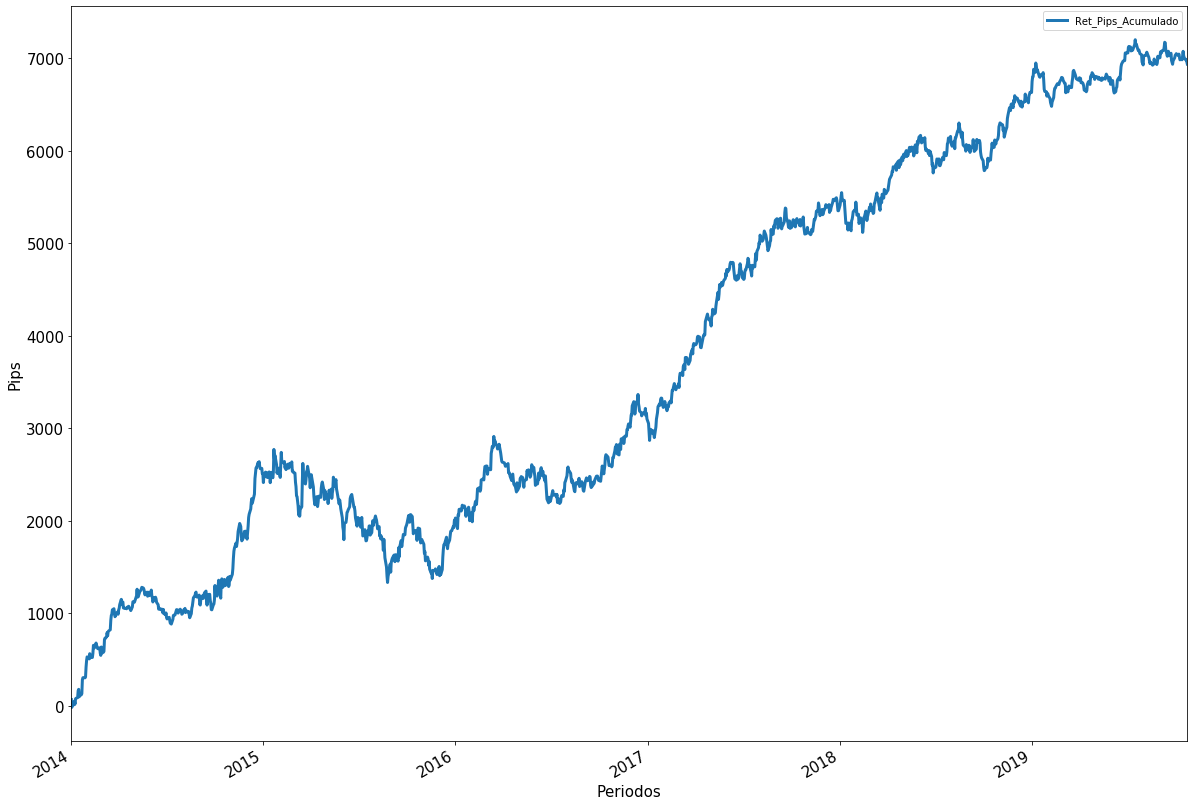

In [182]:
df1_test1["Ret_Pips_Acumulado"].plot(figsize=(20,15)
                                     , linewidth = 3
                                     , fontsize = 15)
plt.xlabel('Periodos'
           , fontsize = 15);
plt.ylabel('Pips'
           , fontsize = 15);
plt.legend()

______________________________________________________

### Passo 8 - Avaliaçao dos modelos

In [183]:
# Comparaçao com resultados aleatorios

df1_test1.loc[: , 'Resultado_Aleatorio'] = np.random.randint(0, 2, size = len(df1_test1)).astype(float)

df1_test1.loc[: , "Resultado_Aleatorio"] = np.where(df1_test1.loc[: , 'Resultado_Aleatorio'] == 1 , df1_test1.loc[: , 'Pips'], '0')
df1_test1.loc[: , "Resultado_Aleatorio"] = np.where(df1_test1.loc[: , 'Resultado_Aleatorio'] == 0 , -1*df1_test1.loc[: , 'Pips'], df1_test1.loc[: , "Resultado_Aleatorio"])

df1_test1.loc[: , "Resultado_Aleatorio"] = df1_test1["Resultado_Aleatorio"].astype(float).cumsum()

df1_test1.loc[: , 'Resultado_Aleatorio2'] = np.random.randint(0, 2, size = len(df1_test1)).astype(float)

df1_test1.loc[: , "Resultado_Aleatorio2"] = np.where(df1_test1.loc[: , 'Resultado_Aleatorio2'] == 1 , df1_test1.loc[: , 'Pips'], '0')
df1_test1.loc[: , "Resultado_Aleatorio2"] = np.where(df1_test1.loc[: , 'Resultado_Aleatorio2'] == 0 , -1*df1_test1.loc[: , 'Pips'], df1_test1.loc[: , "Resultado_Aleatorio2"])

df1_test1.loc[: , "Resultado_Aleatorio2"] = df1_test1["Resultado_Aleatorio2"].astype(float).cumsum()

In [184]:
df1_test1.loc[: , 'Resultado_Aleatorio'].tail()

Data
2019-10-17   -1275.9
2019-10-20   -1300.3
2019-10-21   -1300.3
2019-10-22   -1300.3
2019-10-23   -1300.3
Name: Resultado_Aleatorio, dtype: float64

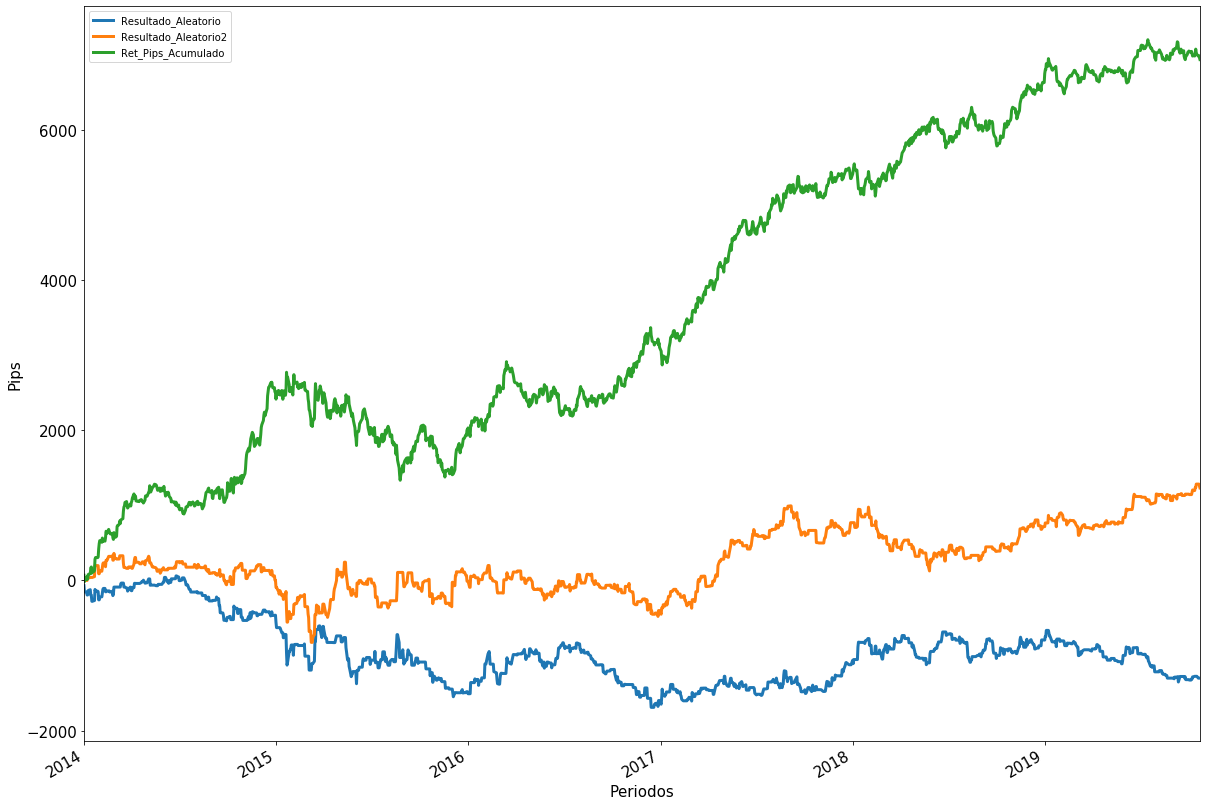

In [185]:
df1_test1["Resultado_Aleatorio"].plot(figsize=(20,15)
                                     , linewidth = 3
                                     , fontsize = 15)
df1_test1["Resultado_Aleatorio2"].plot(figsize=(20,15)
                                     , linewidth = 3
                                     , fontsize = 15)
df1_test1["Ret_Pips_Acumulado"].plot(figsize=(20,15)
                                     , linewidth = 3
                                     , fontsize = 15)
plt.xlabel('Periodos'
           , fontsize = 15);
plt.ylabel('Pips'
           , fontsize = 15);
plt.legend()


______________________________________________________